# Point by point TF 

#### Load dependencies 

In [1]:
import numpy as np
np.random.seed(42)
import tensorflow as tf
tf.set_random_seed(42)
import matplotlib.pyplot as plt
import pandas as pd

#### Create a small data set 

In [2]:
xs = [0., 1., 2., 3., 4., 5., 6., 7.] # feature (independent variable)
ys = [-.82, -.94, -.12, .26, .39, .64, 1.02, 1.1] # labels (dependent variable)

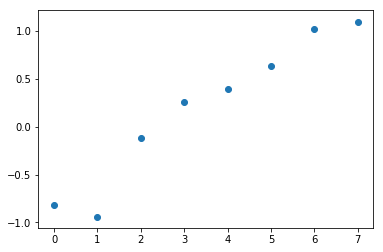

In [3]:
fig, ax = plt.subplots()
_ = ax.scatter(xs, ys)

#### Define Variables 

In [4]:
m = tf.Variable(-0.5)
b = tf.Variable(1.0)

#### Define cost function 

In [5]:
ys_model = m*xs + b
total_error = tf.reduce_sum((ys-ys_model)**2)

#### Define Optimizer 

In [6]:
optimizer_op = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(total_error)
# optimizer_op = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(total_error)

#### define initializer 

In [7]:
initializer_op = tf.global_variables_initializer()

#### Execute Session! 

In [8]:
with tf.Session() as session:
    session.run(initializer_op)
    
#     n_epochs = 10
    n_epochs = 1000    
    for i in range(n_epochs):
        session.run(optimizer_op)
        
    slope, intercept = session.run([m, b])

In [9]:
slope

0.30144188

In [10]:
intercept

-0.8582462

In [11]:
y_hat = intercept + slope*np.array(xs)

In [12]:
pd.DataFrame(list(zip(ys, y_hat)), columns=['y','y_hat'])

,y,y_hat
0,-0.82,-0.858246
1,-0.94,-0.556804
2,-0.12,-0.255362
3,0.26,0.046079
4,0.39,0.347521
5,0.64,0.648963
6,1.02,0.950405
7,1.10,1.251847


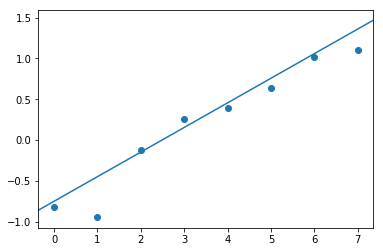

In [13]:
fig, ax = plt.subplots()

ax.scatter(xs, ys)
x_min, x_max = ax.get_xlim()
y_min, y_max = intercept, intercept + slope*(x_max - x_min)

ax.plot([x_min, x_max], [y_min, y_max])
_ = ax.set_xlim([x_min, x_max])